<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Example Codes for Fast Fourier Transforms
===================================================

### Instructions: 

It is suggested that the cell below be run. This cell sets the plot figure size, as well as the font size. Running this cell is optional, though.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

**Introduction:**

#### The Problem:

Generate two time-dependent signals:
 1. A sine wave of frequency $100$.
 2. A superposition of sine waves of different amplitudes (say, $1$ and $0.3$) and different  frequencies (say $100$ and $70$ respectively).
 
Choose a sampling rate (say $1000$) and build a time vector of signal data by sampling the signals at that rate. Evaluate the Fast Fourier Transform of both signals and plot the absolute values as functions of frequency.



In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 20

sample_rate = 1000

Delta = 1/sample_rate
sample_size = 4000
t = np.arange(sample_size) * Delta
padded_size = 2**np.ceil(np.log2(sample_size)).astype(int)

s1 = np.sin(100*t)
s2 = s1 + 0.3 * np.sin(70*t)

sp1 = np.fft.fft(s1, n=padded_size)
sp2 = np.fft.fft(s2, n=padded_size)

freq = np.fft.fftfreq(padded_size, d=t[1]-t[0])
f, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(t[0:600], s1[0:600], "r.-", label='sine wave', alpha=0.6)
ax1.plot(t[0:600], s2[0:600], "b", label='superposition')
ax1.set_xlabel('t')

ax2.plot(2*np.pi*freq, np.abs(sp1)/np.amax(np.abs(sp1)), "r.-", label='sine wave')
ax2.plot(2*np.pi*freq, np.abs(sp2)/np.amax(np.abs(sp2)), "b", label='superposition')
ax2.legend()
ax2.set_xlabel('w')
ax2.set_xlim(-175,175)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 20

sample_rates = [200, 50, 20, 10]
sample_size = 600

for s in sample_rates:
    Delta = 1/s
    t = np.arange(sample_size) * Delta
    padded_size = 2**np.ceil(np.log2(sample_size)).astype(int)
    signal = np.sin(100*t) + 0.3 * np.sin(70*t)
    ft = np.fft.fft(signal, n=padded_size)
    freq = np.fft.fftfreq(padded_size, d=t[1]-t[0])
    plt.plot(2*np.pi*freq, np.abs(ft)/np.amax(np.abs(ft)),\
             label=f'Sample Rate = {s}')

plt.xlabel('t')
plt.legend()
plt.xlabel('w')
plt.xlim(-150,150)
plt.show()

#### The Problem:
Load the following signal data into numpy arrays:

 1. [fftdata/times.npy](fftdata/times.npy)
 2. [fftdata/signal.npy](fftdata/signal.npy)
 3. [fftdata/noisy_signal.npy](fftdata/noisy_signal.npy)

Plot the signal and noisy signal data as functions of time, as well as their FFTs as functions of frequency. 


First, you'll need to procure these data files and place them where they can be accessed by this notebook. Unless you've cloned the GitHub repository in which this notebook lies, you'll have to do this manually. This can be accomplished by running the code cell below.


In [1]:
!mkdir fftdata
!curl -L -o fftdata/times.npy https://github.com/hariseldon99/python_workshop/raw/refs/heads/main/fftdata/times.npy
!curl -L -o fftdata/signal.npy https://github.com/hariseldon99/python_workshop/raw/refs/heads/main/fftdata/signal.npy
!curl -L -o fftdata/noisy_signal.npy https://github.com/hariseldon99/python_workshop/raw/refs/heads/main/fftdata/noisy_signal.npy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 64128  100 64128    0     0  45839      0  0:00:01  0:00:01 --:--:-- 1064k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 64128  100 64128    0     0  90722      0 --:--:-- --:--:-- --:--:-- 90722
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 64128  100 64128    0     0  87711      0 --:--:-- --:--:-- --:--:-- 87711


If you've cloned this repository locally, you do not need to run the code cell above.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18,9)
plt.rcParams['font.size'] = 20

# Load the datasets from files
times = np.load('fftdata/times.npy')
signal = np.load('fftdata/signal.npy')
noisy_signal = np.load('fftdata/noisy_signal.npy')

# Create a 2X2 grid of axes
f, axs = plt.subplots(2,2, sharex='col')

#Plot the raw datasets on the first column axes
axs[0,0].plot(times[0:1000], signal[0:1000], color="blue")
axs[0,0].set_title("Signal Data")
axs[1,0].plot(times[0:1000], noisy_signal[0:1000],color="red")

# Do the FFT of the datasets
sample_size = times.shape[-1]
padded_size = 2**np.ceil(np.log2(sample_size)).astype(int)
ft_sig = np.fft.fft(signal, n=padded_size)
ft_noisy = np.fft.fft(noisy_signal, n=padded_size)
freq = np.fft.fftfreq(padded_size, d=t[1]-t[0])

#Plot the fft datasets on the corresponding rows of the last column
axs[0,1].plot(2*np.pi*freq, np.abs(ft_sig), color='blue', label='Pure')
axs[0,1].set_title("FFT Data")
axs[1,1].plot(2*np.pi*freq, np.abs(ft_noisy), color='red', label='Noisy')
for ax in axs[:,1]:
    ax.set_xlim(-200,200)
    ax.legend()

plt.legend()
plt.show()

Clean up the FFT data of the noisy signal by removing the ‘noisy frequencies’. An easy way to do this is by ‘masking’ the bad data using the masking module in numpy, named ‘numpy.ma’. Finally, take an inverse FFT of the masked data and see if you succeeded in cleaning it up

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

threshold = 200
ft_abs      = np.abs(ft_noisy) 
indices     = ft_abs > threshold   # filter out those value under 300
ft_clean    = indices * ft_noisy # noise frequency will be set to 0
cleaned_signal = np.fft.ifft(ft_clean) # Do inverse FFT

# Create a 2X2 grid of axes
f, axs = plt.subplots(3,2, sharex='col')

#Plot the raw datasets on the first column axes
axs[0,0].plot(times[0:1000], noisy_signal[0:1000], color='red')
axs[0,0].set_title("Signal Data")
axs[1,0].plot(times[0:1000], cleaned_signal[0:1000].real, color='green')
axs[2,0].plot(times[0:1000], signal[0:1000].real, color='blue')

#Plot the fft datasets on the corresponding rows of the last column
axs[0,1].plot(2*np.pi*freq, np.abs(ft_noisy), color='red', label='Noisy')
axs[0,1].set_title("FFT Data")
axs[1,1].plot(2*np.pi*freq, np.abs(ft_clean), color='green', label='Cleaned')
axs[2,1].plot(2*np.pi*freq, np.abs(ft_sig), color='blue', label='Pure')
for ax in axs[:,1]:
    ax.set_xlim(-200,200)
    ax.legend()

plt.show()

## Exercise 01: 

Use a similar technique to separate the two frequencies in the cleaned data and plot them 
Independently.

**Comparing DFT with FFT**

### The Problem

Write (or find) a Python routine that:

 1. Takes a numpy array f as its argument. 
 2. Evaluates the DFT vector F  
 3. Evaluates the execution time.
 4. Returns both of the above.

In [4]:
import numpy as np

def dft(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    N = x.shape[-1]
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return e @ x

x = np.random.random(100)
print(np.allclose(dft(x), np.fft.fft(x)))

True


Generate random column vectors of sizes $16, 32, 64, 128, 256, 512,1024, 2048$, and $4096$. Run the above subroutine and plot the execution time as a function of data size. Interpret the curve. Repeat the steps above with the builtin FFT routine. Compare the plots.

### Suggestion:

Use log-scale for the times in the y-axis.

8it [00:50,  6.30s/it]


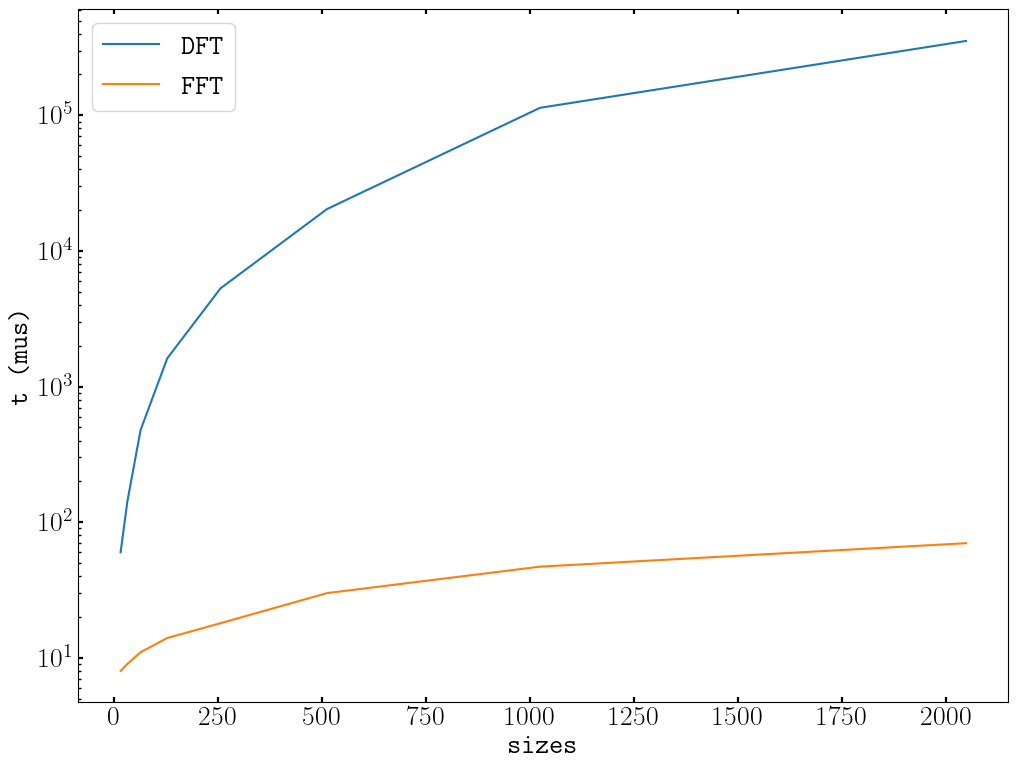

In [8]:
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 20

from timeit import Timer
defnum = 20

mysetup = 'import numpy as np\n'
mysetup += '''def dft(x):
                N = x.shape[-1]
                n = np.arange(N)
                k = n.reshape((N, 1))
                e = np.exp(-2j * np.pi * k * n / N)
                return e @ x'''

sizes = 2**np.arange(4,12)
times_dft = np.zeros_like(sizes)
times_fft = np.zeros_like(sizes)
for i,s in tqdm(enumerate(sizes)):
    dft = Timer(setup=mysetup, stmt=f"dft(np.random.random({s}))")
    times_dft[i] = min(dft.repeat(number=defnum)) * 1e6 / defnum
    fft = Timer(setup=mysetup, stmt="np.fft.fft(np.random.random(%d))" % (s,))
    times_fft[i] = min(fft.repeat(number=defnum)) * 1e6 / defnum

plt.plot(sizes, times_dft,label="DFT")
plt.plot(sizes, times_fft, label="FFT")
plt.xlabel("sizes")
plt.ylabel("t (mus)")
plt.yscale('log')
plt.legend()
plt.show()

## Exercise 02:

 1. Plot the execution time for the DFT case as a function of $N^2$, where $N$ is the vector size.
 2. Plot the execution time for the FFT case as a function of $N\log_2{N}$.
 3. What can you infer from these graphs?


**Convolutions via FFT**

### The Problem

Generate two vectors $f$ and $g$ of equal size (choose a large size, preferably a power of $2$), consisting of random numbers, and evaluate the convolution vector $c = f \otimes g$, where the elements of $c$ are given by

\begin{equation*}
c_l = \sum_j f_{l-j}\times g_{j}
\end{equation*}

1. Imagine that the elements of $f$ lie on a ring. Then, the $l^{th}$ component of $c$ involves the components of $f$ after ‘rolling’ this ring by $l$ places.
2. In numpy, there is a function ‘numpy.roll’ that does this. Use that function.

Now, get the FFTs of the two vectors, compute their element-wise product, and do the IFFT of the result. Sum over this. Is the sum equal to the previous result? Why? **Hint:** Recall the convolution theorem from the theory of Fourier Transforms. 

Use the %timeit magic to determine which of the two methods obtained in the previous problem is faster.

In [ ]:
import numpy as np

N = 2**3
f = np.random.random(N)
g = np.random.random(N)

print("Normal Convolution:")
%timeit c = np.array([np.sum(np.roll(f,-l-1)[::-1]*g) for l in range(N)])
c = np.array([np.sum(np.roll(f,-l-1)[::-1]*g) for l in range(N)])

print("\nConvolution by FFT:")
%timeit c_fft = np.fft.ifft(np.fft.fft(f) * np.fft.fft(g))
c_fft = np.fft.ifft(np.fft.fft(f) * np.fft.fft(g))

print("\nAre they equal?", np.allclose(c, c_fft))

## Signal Processing with FFT


This next exercise involves **processing of digital signals using Fast Fourier Transform**. It will involve listening to sounds, so you might want to setup a pair of headphones (wired or wireless) in order to discern subtle undertones more carefully. 

The Scientific Python library (`SciPy`) has many modules, classes, and functions available to read data from and write data to a variety of file formats. These are available in `scipy.io`, the Scipy Input-Output submodule. In that submodule, there is a submodule that allows for inter-operation between `NumPy` arrays and sound files, specifically the `Waveform Audio` or `wav` file. Let us import it into our notebook.

In [ ]:
from scipy.io import wavfile

Next, download the sample audio files from the repository to your virtual machine. Note that, if you've cloned the repository locally to your computer, you do not need to do this.

In [ ]:
!curl -L -o fftdata/noise_a3s.wav https://github.com/hariseldon99/python_workshop/raw/refs/heads/main/fftdata/noise_a3s.wav
!curl -L -o fftdata/hun_60_hz.wav https://github.com/hariseldon99/python_workshop/raw/refs/heads/main/fftdata/hum_60_Hz.wav
!curl -L -o fftdata/unknown.wav https://github.com/hariseldon99/python_workshop/raw/refs/heads/main/fftdata/unknown.wav

Next we play a wav file named `noise_a3s.wav`.  
To play the audio in the file, use the `IPython.display.Audio` submodule.

In [ ]:
import IPython.display as ipd
ipd.Audio('fftdata/noise-a3s.wav') # load a local WAV file

Oops! There is an exception! The `wav` file just contains a bare `NumPy` array with no information on sample rates. Fortunately, those can be calculated by the `wavfile.read()` method.

In [ ]:
sampFreq, sound = wavfile.read('fftdata/noise_a3s.wav')
ipd.Audio('fftdata/noise_a3s.wav', rate=sampFreq) # load a local WAV file

The audio contains the note **A3#** played by piano and recorded with a microphone. The fundamental frequency (F0) of this note is **233.8 Hz**. There are multiple higher order terms in the Fourier series of the wave amplitude. Theoretically, if the amplitude of an ideally time-periodic signal $s(t)$ is decomposed into a Fourier series as
\begin{equation*}
s(t) = c_0 + \sum_{n\neq 0} c_n e^{in\omega t},
\end{equation*}
then the $n=\pm 1$ terms constitute the fundamental mode, with $\omega$ as the fundamental frequency. The rest are higher order modes, or ***overtones***.

**However**, listen to the sound carefully, multiple times, if necessary. There is a corruption in the sound (more audible later on during playback) that sounds like a low frequency (low-pitch) hum ***underneath*** the desired sound, like someone is playing an unwanted low-pitch tune in the background.

We need to use FFTs remove this unwanted noise from the signal and obtain a clearer sound. 


First, some notes on digital audio :

* Typically, stereo **wav**-file contains two arrays of integers: for the right and left channel (for your right and left speaker) respectively.
* In digital audio, the sound wave of the audio signal is encoded as numerical samples in continuous sequence. 
* In `WAV` audio, samples are taken $44100$ times per second (the ***sample frequency***) each with a $16$-bit sample depth, ***i.e.***, each number is stored in memory as a digital binary integer (signed) that is $16$ bits wide. 
* Thus, the range of possible values are $2^{16} = 65536$: ranging from $-32768$ to $32767$. 
* The file format also allows for the possibility of the more refined $32$-bit sample depth.
* The `scipy.io.wavfile.read()` method reads wav files as `int16` (for 16-bit wavs) or `int32` (for 32-bit wavs). We can check the type of the sound as follows:

In [ ]:
sound.dtype, sampFreq

Clearly, this sound is recorded at a sample frequency of $44100$ and each value is $16-$bits wide, now loaded and stored in the `NumPy` array named `sound`.

Next, let us map the amplitude data to the interval $\left[-1, 1\right]$. This is easy:

In [ ]:
sound = sound / 2.0**15
display(sound)

From the shape of the sound array, we can determine that the wav file has two channels and $45568$ sample points.

In [ ]:
sound.shape

Given that the sample rate is given by `sampFreq`, the total signal time can be calculated

In [ ]:
nsamples, nchannels = sound.shape
signal_time = nsamples/sampFreq
print(f"Signal time is {signal_time} secs")

Let us now plot the left and right amplitudes.

In [ ]:
time_array = np.arange(0, nsamples) / sampFreq

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(18, 9))

axs[0].plot(time_array, sound[:, 0], color='blue')
axs[0].set_title('Left Channel')
axs[0].set_ylabel('Amplitude')

axs[1].plot(time_array, sound[:, 1], color='red')
axs[1].set_title('Right Channel')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude');

You can clearly see that the ideal sound is a periodic wave, but there are distortions from around $0.1$ seconds to $0.7$ seconds (you heard them as  a low-pitched background hum). Now, it should be obvious what to do to get rid of this noise. First, do FFTs and plot the amplitudes

In [ ]:
# Perform FFT on both channels
fft_left = np.fft.fft(sound[:, 0])
fft_right = np.fft.fft(sound[:, 1])

# Compute the frequencies corresponding to the FFT values
freqs = np.fft.fftfreq(nsamples, 1/sampFreq)

# Plot the FFT amplitudes
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(18, 9))

axs[0].plot(freqs, np.abs(fft_left), color='blue')
axs[0].set_title('FFT of Left Channel')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs, np.abs(fft_right), color='red')
axs[1].set_title('FFT of Right Channel')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Amplitude')

plt.show()

Although the bandwidth of the human ear is supposed to be 20-Hz to 20-kHz, the frequencies that comprise this sound is well below the upper cutoff, tapering out at around 3-kHz. Let's magnify the by zooming in on a smaller frequency window and changing the amplitude to a decibel-like log-scale.

In [ ]:
# Plot the FFT amplitudes with magnified x range
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(18, 9))

axs[0].plot(freqs, np.abs(fft_left), color='blue')
axs[0].set_title('FFT of Left Channel')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0, 3800)

axs[1].plot(freqs, np.abs(fft_right), color='red')
axs[1].set_title('FFT of Right Channel')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlim(0, 3800)
axs[0].set_yscale('log')
axs[1].set_yscale('log')


Notice that the plot exhibits a significant spike around $60$-Hz, which corresponds to the AC frequency standard in Canada, where the recording was made. This frequency is quite noticeable during playback. In contrast, India uses a $50$-Hz standard.

This phenomenon, known as **electric hum**, results from pervasive AC electromagnetic fields from nearby devices and wiring. This $60$-Hz noise infiltrates audio systems, getting recorded via microphones. Interestingly, when using a laptop's built-in microphone, disconnecting the charger can help mitigate this interference.

To perceive this aurally, play the pure $60-Hz$ audio signal from the downloaded audio files and compare with the running sound file. Play them at a slower playback speed, if necessary.

In [ ]:
ipd.Audio('fftdata/noise_a3s.wav', rate=sampFreq) # load a local WAV file

In [ ]:
ipd.Audio('fftdata/hum_60_Hz.wav') # load a local WAV file

Also, notice that the second prominent peak is at around **233 Hz**. This should be the fundamental frequency, while the other peaks are overtones. Besides the $60$-Hz noise, we observe peaks at around $233$-Hz, $465$-Hz, $698$-Hz, etc., all approximately multiples of $233$-Hz.

Note that the best way to determine these peak positions is by using a **peak-fitting library** like [`lmfit`](https://lmfit.github.io/lmfit-py/) on the audio dataset. In the interest of simplicity, however, we choose to eyeball the peak positions here. Interested participants might check the [Built-in fitting models](https://lmfit.github.io/lmfit-py/builtin_models.html) available with `lmfit` for details.

In any case, the remainder of the task should now be obvious. Just delete amplitude data around $60$-Hz. For good measure, also delete any ultrasonic data above $20$-KHz, as well as subsonic data below $20$-Hz. We can't hear those anyway. Removing those redundant sounds can help ***compress*** the audio file better, an added bonus of FFT! 

In [ ]:
#Masks for the included frequencies
included_idx = np.array([np.abs(f) > 62 or np.abs(f) < 58 for f in freqs])
audible_idx = np.array([np.abs(f) <= 20000 and np.abs(f) >= 20 for f in freqs])
fft_left_clean = fft_left * included_idx * audible_idx
fft_right_clean = fft_right * included_idx * audible_idx

In [ ]:
noiseless_left = np.fft.ifft(fft_left_clean)
noiseless_right = np.fft.ifft(fft_right_clean)

#Stack the left and right sounds
noiseless_sound = np.column_stack((noiseless_left, noiseless_right))

# Re-scale back to integers
noiseless_sound = np.round(noiseless_sound * 2.0**15).astype(np.int16)
wavfile.write('fftdata/noiseless_output.wav', sampFreq, noiseless_sound) 

Now, aurally compare the new noiseless audio with the original noise audio and hear the difference for yourself!

In [ ]:
ipd.Audio('fftdata/noiseless_output.wav', rate=sampFreq) # load the file and play it.

In [ ]:
ipd.Audio('fftdata/noise_a3s.wav', rate=sampFreq) # load a local WAV file

Finally, let us devise a quick and dirty way to use some signal processing techniques and estimate the dominant frequency in a given time-series signal. The basic steps are:

* Do FFT and find a crude estimate of the peak from the maximum value.
* Use the [Blackman-Harris window](https://www.recordingblogs.com/wiki/blackman-harris-window), together with (inverted) parabolic interpolation, to find a more refined estimate of the peak. See [Quadratic Interpolation of Spectral Peaks](https://ccrma.stanford.edu/~jos/sasp/Quadratic_Interpolation_Spectral_Peaks.html) for details. The [Blackman-Harris window](https://www.recordingblogs.com/wiki/blackman-harris-window) is basically a way to extract a chunk of the signal continuously by weighing it with the following tempered function
  \begin{equation*}
    \begin{gathered}
    a(k)=0.35875-0.48829 \cos \left(\frac{2 \pi k}{N-1}\right)+0.14128 \cos \left(\frac{4 \pi k}{N-1}\right) \\
    -0.01168 \cos \left(\frac{6 \pi k}{N-1}\right).
    \end{gathered}
  \end{equation*}
Here, $N$ is the length of the window, and $k\in [0,1,2\cdots, N-1]$. The `scipy.signal.windows` module has a built-in `blackmanharris` function that we can use.

In [ ]:
from scipy.signal.windows import blackmanharris
window = blackmanharris(201)
plt.plot(window)
plt.title("Blackman-Harris window")
plt.ylabel("Amplitude")
plt.xlabel("Sample");

Here are two functions, one that does the parabolic interpolation, and the other that FFT's a signal and uses the Blackman-harris window, together with the parabolic routine, to estimate the peak frequency position. 

In [ ]:
from scipy.io import wavfile
from numpy.fft import rfft
from numpy import argmax, log
from scipy.signal.windows import blackmanharris

def parabolic(f, x):
    """Quadratic interpolation for estimating the true position of an
    inter-sample maximum when nearby samples are known.
    f is a vector and x is an index for that vector.
    Returns (vx, vy), the coordinates of the vertex of a parabola that goes
    through point x and its two neighbors.
    Example:[Blackman-Harris window](https://www.recordingblogs.com/wiki/blackman-harris-window)
    Defining a vector f with a local maximum at index 3 (= 6), find local
    maximum if points 2, 3, and 4 actually defined a parabola.
    In [3]: f = [2, 3, 1, 6, 4, 2, 3, 1]
    In [4]: parabolic(f, argmax(f))
    Out[4]: (3.2142857142857144, 6.1607142857142856)
    """
    xv = 1/2. * (f[x-1] - f[x+1]) / (f[x-1] - 2 * f[x] + f[x+1]) + x
    yv = f[x] - 1/4. * (f[x-1] - f[x+1]) * (xv - x)
    return (xv, yv)


def freq_from_fft(sig, fs):
    """
    Estimate frequency from peak of FFT
    """
    # Compute Fourier transform of windowed signal
    windowed = sig * blackmanharris(len(sig))
    f = rfft(windowed)

    # Find the peak and interpolate to get a more accurate peak
    i = argmax(abs(f))  # Just use this for less-accurate, naive version
    #true_i = i
    true_i = parabolic(log(abs(f)), i)[0]

    # Convert to equivalent frequency
    return fs * true_i / len(windowed)

Now, use this function to get the dominant frequency of the noisy and noise-free signal and check...

In [ ]:
sampFreq, sound = wavfile.read('fftdata/noise_a3s.wav')
left_sound = sound[:, 0]
right_sound = sound[:, 1]
freq_from_fft(left_sound, sampFreq), freq_from_fft(right_sound, sampFreq)

In [ ]:
sampFreq, sound = wavfile.read('fftdata/noiseless_output.wav')
left_sound = sound[:, 0]
right_sound = sound[:, 1]
freq_from_fft(left_sound, sampFreq), freq_from_fft(right_sound, sampFreq)

The noisy signal gives the electric hum as the dominant frequency, whereas the FFT-cleaned signal gives the correct fundamental mode.

**Note:** This method has a drawback, that it doesn't find the right value if the overtones are stronger than fundamental (then it'll mistakenly pick up the strongest overtone). In that case, more sophisticated techniques are needed. Fortunately, in our case, the overtones are weaker than the fundamental.

### Homework

As an added bonus, the noiseless file compresses better due to a lot of the unnecessary data being set to zero. To see this in a simple way, download both the noise audio and noiseless audio to your local computer, zip them and check the respective file sizes!


## Spectograms and FFT


A spectrogram is a graph that displays the strength of a signal over time for a given frequency range. Using a color spectrum, it points to the frequencies where the signal’s energy is highest and shows the energy variation over time.


For a time-dependent vibration signal, a spectrogram’s color scale identifies the frequencies of a waveform’s amplitude peaks over time. Unlike a time or frequency graph, a spectrogram correlates peak values to time and frequency. Spectrograms can be used to analyze the frequency content of a continuous waveform, locating strong signals and determining how the vibration behavior changes over time.


Thus, spectrograms are visual representations of audio – representing time, frequency, and amplitude all on one graph.  Spectrograms are actually created using `Short-time Fourier Transform` `(STFT)`. The idea is that we divide the audio signal into small pieces and then the FFT of each piece is plotted on the graph against time.


As it happens, the `matplotlib` plotting library has a `specgram()` method that accomplishes the STFT automatically, requiring little bioler-plate coding. As a simple illustration, let us do a spectogram of a single sine wave.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Number of sample points. 
#Too many sample points you risk 'oversampling' the signal
# While oversampling doesn't introduce errors, it can decrease the frequency resolution of your FFT.
ntotal = 5000

signal_freq = 25
# Generating an array of values
times = np.linspace(0, 50, ntotal)
dt = times[1] - times[0]

# Actual data array which needs to be plot
signal = 20*(np.sin(2 * np.pi * signal_freq * times))

# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(signal, Fs=1/dt, cmap="rainbow")
plt.colorbar(label='Intensity [dB]')

# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.xlabel("time")
plt.ylabel("Frequencies (Hz)")

#Theoretical peak position at signal_freq
plt.axhline(signal_freq, color='black', linestyle='--')
plt.show()


The keyword argument `Fs` takes the sampling frequency (samples per time unit). It is used to calculate the Fourier frequencies, freqs, in cycles per time unit.

By default, the `specgram()` method uses $256$ data points for each 'block', or chunk, for the FFT. This can be changed using the `NFFT` keyword.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#More sample points
ntotal = 5000

signal_freq = 25
# Generating an array of values
times = np.linspace(0, 50, ntotal)
dt = times[1] - times[0]

# Actual data array which needs to be plot
signal = 20*(np.sin(2 * np.pi * signal_freq * times))


# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(signal, Fs=1/dt, cmap="rainbow", NFFT=512)
plt.colorbar(label='Intensity [dB]')

# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.xlabel("time")
plt.ylabel("Frequencies (Hz)")

#Theoretical peak position at signal_freq
plt.axhline(signal_freq, color='black', linestyle='--')
plt.show()

Note that the spectogram will not correspond exactly with that predicted by naive Fourier theory. This happens, in large part, due to each chunk being selected according to a weighed windowing routine by `specgram()`. This is done through the `window` keyword argument, which is a Hanning window function by default. Let's change it to `window_none` and see.

In [ ]:
from matplotlib.mlab import window_none
# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(signal, Fs=1/dt, cmap="rainbow", NFFT=1024, window=window_none)
plt.colorbar(label='Intensity [dB]')

# The gca(), or 'get current axis' method yieds the running axis object
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_tick_params(which='both', labelbottom=True, labeltop=True)
plt.gca().yaxis.set_tick_params(which='both', labelleft=True, labelright=True)
# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.xlabel("time")
plt.ylabel("Frequencies (Hz)")


#Theoretical peak position at signal_freq
plt.axhline(signal_freq, color='black', linestyle='--')
plt.show()

Finally, let us get a spectogram of that noisy sound from before, and compare side-by-side with the noise-filtered one.

In [ ]:

from scipy.io import wavfile
noisy_sampFreq, noisy_sound = wavfile.read('fftdata/noise_a3s.wav')

clean_sampFreq, clean_sound = wavfile.read('fftdata/noiseless_output.wav')

fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True)

# Matplotlib.pyplot.specgram() function to
# generate spectrogram
ax0.specgram(noisy_sound[:,0], Fs=noisy_sampFreq, cmap="rainbow", window=window_none)
ax0.set_title('Noisy Signal')
ax1.set_ylabel('Frequencies [Hz]')

ax1.specgram(clean_sound[:,0], Fs=clean_sampFreq, cmap="rainbow", window=window_none)
ax1.set_title('Cleaned Signal')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Frequencies [Hz]')

#Zoom in on and mark the fundamental mode and first few overtones
fudamental_freq = freq_from_fft(clean_sound[:,0], clean_sampFreq)
modes = [1,2,3]
for ax in (ax0, ax1):
    ax.set_ylim(0, 1.5 * modes[-1] *fudamental_freq)

for m in modes:
    ax1.axhline(m * fudamental_freq, color='black', linestyle='--', alpha=0.2)

plt.show()

As you can see, sound is a lot cleaner, with the electric hum and subsonic frequencies gone, and the prominent sound at the fundamental mode is much more visible.

This type of signal filtering is very basic, and there are more sophisticated techniques that yield better results, including those involving artificial intelligence. Nonetheless, all of them involve FFTs, either directly or indirectly.

## Exercise 03: Spectrogram using FFT
1. Generate a signal that consists of two sine waves with different frequencies that change very slowly over time (say, linearly). Use a sampling rate of 1000 Hz.
2. Compute the spectrogram of the signal using FFT. Plot the spectrogram to visualize how the frequency content of the signal changes over time.


## Exercise 04: FFT of Real-World Data

In the file named `fftdata/unknown.wav`, find the fundamental frequency and remove all the overtones form the Fourier spectrum. Restore the original sound, save it with the filename `fftdata/no_overtones.wav` and play the sound to hear if you like it. Why are overtones so important?

**Hints:** 
   1. Compare the sounds of a sitar and guitar.
   2. It might be a good idea to amplify the FFTs by a factor of, say 10, so that the sound amplitude goes up to hearing level.